# Lottery Analysis

Powerball is an American lottery game where a player selects five numbers between `1` and `69`. These five numbers are the five `white balls`. In addition, a player selects one number between `1` and `26`. This number is the `red Powerball`, which acts as a multiplier.

Players can choose their numbers on a play slip or let the lottery terminal randomly pick their numbers.

## Project Overview

Overview

## Dataset Overview


In [1]:
import csv # Python library used for reading and writing tabular data in CSV format.
import pandas as pd # Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data. 
import json # Python library for encoding and decoding custom objects by using JSON encoder and decoder classes.
import numpy as np # Python library for adding support to large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import seaborn as sns #Python library for statistical visualizations
import statistics as stat #Python library for statistical operations
import matplotlib.pyplot as plt # Python library for creating graphs
from scipy import stats # Python library for linear regression

In [2]:
lottery = pd.read_csv("Lottery_Powerball_Winning_Numbers__Beginning_2010.csv")

In [3]:
lottery.dtypes

Draw Date           object
Winning Numbers     object
Multiplier         float64
dtype: object

After conducting an initial inspection of the data, we have three variables: 
- `Draw Date`: an **object** type value, the `Draw Date` is the date that a particular draw was held.
- `Winning Numbers`: an **object** type value, there are two types of balls to be drawn
    - the first five `Winning Numbers` are `white ball`s which are numbered `1` to `69`
    - the last of the `Winning Numbers` is a `red ball`, which is numbered `1` to `26`.
- `Multiplier`: a **float64** type value, the `Multiplier` is a number that is randomly drawn from `2`, `3`, `4`, `5`, or `10` prior to the `Winning Numbers` draw. This value can *multiply* non-jackpot prizes by the drawn amount. The `10`x `Multiplier` is only in play when the advertised jackpot annuity is $150 million or less.

In order to utilize the values of the `Winning Numbers`, we will creating new columns based off of `Winning Numbers`.

In [4]:
# Define a new list of just the Winning Numbers
winning_numbers = lottery["Winning Numbers"]

# Define empty lists for each winning number position
winning_number_first = []
winning_number_second = []
winning_number_third = []
winning_number_fourth = []
winning_number_fifth = []
winning_number_sixth = []

# Loop over each of the Winning Numbers to append the empty lists above
for number in winning_numbers:
    first = number[0:2]
    winning_number_first.append(first)
    
    second = number[3:5]
    winning_number_second.append(second)
    
    third = number[6:8]
    winning_number_third.append(third)
    
    fourth = number[9:11]
    winning_number_fourth.append(fourth)
    
    fifth = number[12:14]
    winning_number_fifth.append(fifth)
    
    sixth = number[15:]
    winning_number_sixth.append(sixth)
    
# Create new columns in lottery
lottery["First Winning Number"] = winning_number_first
lottery["Second Winning Number"] = winning_number_second
lottery["Third Winning Number"] = winning_number_third
lottery["Fourth Winning Number"] = winning_number_fourth
lottery["Fifth Winning Number"] = winning_number_fifth
lottery["Red Ball Number"] = winning_number_sixth

# Change the Types of the newly created columns
lottery["First Winning Number"] = lottery["First Winning Number"].astype("int")
lottery["Second Winning Number"] = lottery["Second Winning Number"].astype("int")
lottery["Third Winning Number"] = lottery["Third Winning Number"].astype("int")
lottery["Fourth Winning Number"] = lottery["Fourth Winning Number"].astype("int")
lottery["Fifth Winning Number"] = lottery["Fifth Winning Number"].astype("int")
lottery["Red Ball Number"] = lottery["Red Ball Number"].astype("int")

## White Balls vs Red Balls
We will now take our updated `lottery` DataFrame and create new DataFrames to capture `White Balls` and `Red Balls`.

In [5]:
# Define an empty list
white_numbers = []
red_numbers = []

# Define a function to append numbers from a list to all_numbers
def transfer_number(numbers, append_list):
    for number in numbers:
        append_list.append(number)

# Use transfer_number to append all_numbers
transfer_number(winning_number_first, white_numbers)
transfer_number(winning_number_second, white_numbers)
transfer_number(winning_number_third, white_numbers)
transfer_number(winning_number_fourth, white_numbers)
transfer_number(winning_number_fifth, white_numbers)
transfer_number(winning_number_sixth, red_numbers)

# Transform the lists into a Pandas DataFrame
all_white_numbers = pd.DataFrame({"Number": white_numbers})
all_red_numbers = pd.DataFrame({"Number": red_numbers})

# Define the type of Number as int
all_white_numbers["Number"] = all_white_numbers["Number"].astype("int")
all_red_numbers["Number"] = all_red_numbers["Number"].astype("int")
#print(len(lottery)) # Output: 1529
#print(len(all_white_numbers)) # Output: 7645
#print(len(all_red_numbers)) # Output: 1529

Now that we have the DataFrames `all_white_numbers` and `all_red_numbers`, we will visualize the frequency of each of the numbers drawn.

We will assume that each `White Ball` has an equal chance of being drawn on any given drawing. Since we have 1,529 observations in our `lottery` dataset, and since we have `5` drawings for `White Balls` in each drawing, the total number of `White Balls` drawn is `7,645`. Therefore, we should expect that each number, from `1` to `69`, should be drawn

$$ \frac{7645}{69} ≈ 110.8 \text{ times.} $$

We will also assume that each `Red Ball` has an equal chance of being drawn on any given drawing. Since we have 1,529 observations in our `lottery` dataset, and since there is only `1` drawing of `Red Balls` per drawing, then the total number of `Red Balls` drawn is `1,529`. Therefore, we should expect that each number, from `1` to `26`, should be drawn

$$ \frac{1529}{26} ≈ 58.8 \text{ times.} $$

We will now create a Table of Frequency and a Table of Relative Frequency for both `all_white_numbers` and `all_red_numbers`.

In [6]:
# Create a Table of Frequency and Relative Frequency for each White Ball
all_white_frequency = all_white_numbers["Number"].value_counts(normalize = False).reset_index().sort_values("Number")
all_white_relative_frequency = all_white_numbers["Number"].value_counts(normalize = True).reset_index().sort_values("Number")

# Create a Table of Frequency and Relative Frequency for each Red Ball
all_red_frequency = all_red_numbers["Number"].value_counts(normalize = False).reset_index().sort_values("Number")
all_red_relative_frequency = all_red_numbers["Number"].value_counts(normalize = True).reset_index().sort_values("Number")


After creating our tables, we will visualize the data using bar charts. 

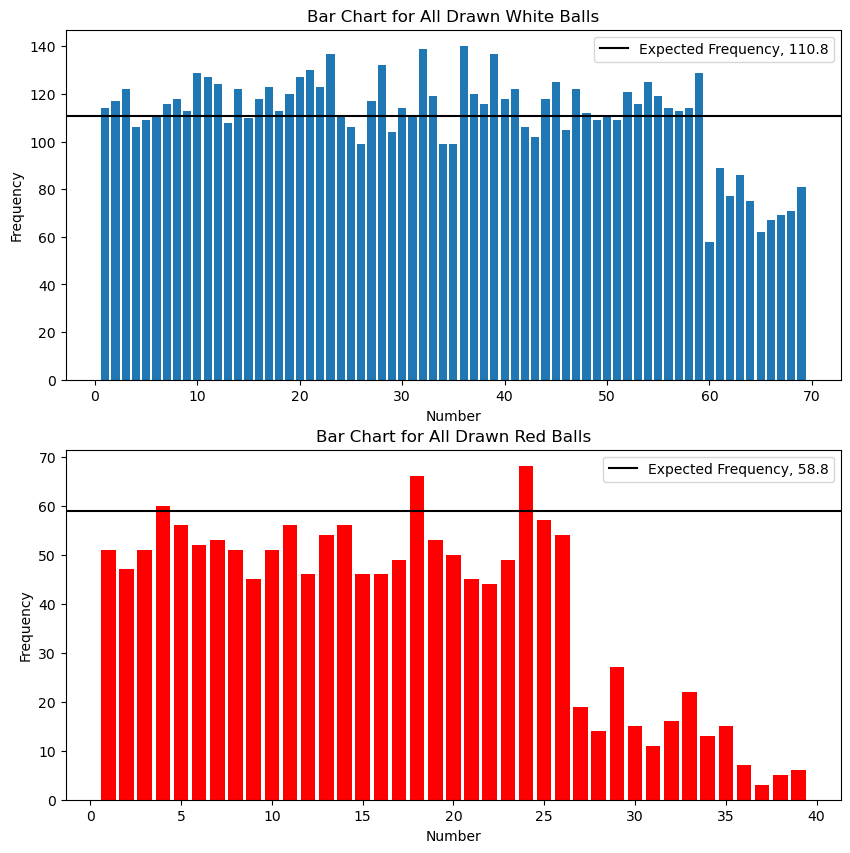

In [7]:
# Create a Figure 
plt.figure(figsize = (10, 10))

# Create the First Subplot
ax1 = plt.subplot(2, 1, 1)

# Create a Bar Chart
plt.bar(all_white_frequency["Number"],
       all_white_frequency["count"])

# Create the expected value for frequency
expected_value = len(all_white_numbers) / 69

# Plot the expected_value
plt.axhline(y = expected_value, color = "black", label = "Expected Frequency, 110.8")

# Create Labels
plt.title("Bar Chart for All Drawn White Balls")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.legend()

#################
# Create the Second Subplot
ax1 = plt.subplot(2, 1, 2)

# Create a Bar Chart
plt.bar(all_red_frequency["Number"],
       all_red_frequency["count"],
       color = "red")

# Create the expected value for frequency
expected_value = len(all_red_numbers) / 26

# Plot the expected_value
plt.axhline(y = expected_value, color = "black", label = "Expected Frequency, 58.8")

# Create Labels
plt.title("Bar Chart for All Drawn Red Balls")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.legend()

# Show and Close the Plot
plt.show()
plt.close()

Our graphs show some interesting discoveries. First, there is an overwhemingly large gap from the expected line of 110.8 to `60` through `69` in the **Bar Chart for All Drawn White Balls**. Second, we are seeing `Red Balls` drawn with a value greater than `26` in the **Bar Chart for All Drawn Red Balls**. What is going on?

## The Powerball 2015 Format Change

The Powerball format changed on October 4, 2015. The `White Ball` pool **increased** from `59` to `69`, while the Powerball `Red Ball` pool **decreased** from `35` to `26`. This ultimately made it easier to win *a prize* but more difficult to win *the grandprize*. 

See [Wikipedia's Article](https://en.wikipedia.org/wiki/Powerball#:~:text=joined%20Mega%20Millions.-,2015%20format%20change,-%5Bedit%5D) detailing the new rule changes and the [Los Angeles Times](https://www.latimes.com/business/hiltzik/la-fi-mh-powerball-rules-were-tweaked-20160112-column.html) artile for more details on the rule change.

We will need to create a new DataFrame to make sure our data is following the current rule structure.

In [8]:
# Create new columns to gather data on the date
lottery["Draw Month"] = lottery["Draw Date"].apply(lambda x: x.split("/")[0]).astype("int")
lottery["Draw Day"] = lottery["Draw Date"].apply(lambda x: x.split("/")[1]).astype("int")
lottery["Draw Year"] = lottery["Draw Date"].apply(lambda x: x.split("/")[2]).astype("int")

To be safe, we will use all drawings starting on `January 2016` since the rule change was on `October 4, 2015`.

In [9]:
# Create a new DataFrame with only data post-rule change
lottery = lottery[lottery["Draw Year"] >= 2016]

We will now repeat the steps to create a Bar Chart to visualize the drawn numbers for `White Balls` and `Red Balls`.

In [10]:
# Define an empty list
white_numbers = []
red_numbers = []

# Use transfer_number to append all_numbers
transfer_number(lottery["First Winning Number"], white_numbers)
transfer_number(lottery["Second Winning Number"], white_numbers)
transfer_number(lottery["Third Winning Number"], white_numbers)
transfer_number(lottery["Fourth Winning Number"], white_numbers)
transfer_number(lottery["Fifth Winning Number"], white_numbers)
transfer_number(lottery["Red Ball Number"], red_numbers)

# Transform the lists into a Pandas DataFrame
all_white_numbers = pd.DataFrame({"Number": white_numbers})
all_red_numbers = pd.DataFrame({"Number": red_numbers})

# Define the type of Number as int
all_white_numbers["Number"] = all_white_numbers["Number"].astype("int")
all_red_numbers["Number"] = all_red_numbers["Number"].astype("int")
#print(len(lottery)) # Output: 913
#print(len(all_white_numbers)) # Output: 4565
#print(len(all_red_numbers)) # Output: 913

After cleaning our dataset to consider the **Powerball 2015 Format Change**, we now have `913` observations in `lottery`.

Now that we have the new DataFrames `all_white_numbers` and `all_red_numbers`, we will visualize the frequency of each of the numbers drawn.

We will assume that each `White Ball` has an equal chance of being drawn on any given drawing. Since we have 913 observations in our `lottery` dataset, and since we have `5` drawings for `White Balls` in each drawing, the total number of `White Balls` drawn is `4,565`. Therefore, we should expect that each number, from `1` to `69`, should be drawn

$$ \frac{4565}{69} ≈ 66.2 \text{ times.} $$

We will also assume that each `Red Ball` has an equal chance of being drawn on any given drawing. Since we have 913 observations in our `lottery` dataset, and since there is only `1` drawing of `Red Balls` per drawing, then the total number of `Red Balls` drawn is `913`. Therefore, we should expect that each number, from `1` to `26`, should be drawn

$$ \frac{913}{26} ≈ 35.1 \text{ times.} $$

We will now create a Table of Frequency and a Table of Relative Frequency for both `all_white_numbers` and `all_red_numbers`.

In [11]:
# Create a Table of Frequency and Relative Frequency for each White Ball
all_white_frequency = all_white_numbers["Number"].value_counts(normalize = False).reset_index().sort_values("Number")
all_white_relative_frequency = all_white_numbers["Number"].value_counts(normalize = True).reset_index().sort_values("Number")

# Create a Table of Frequency and Relative Frequency for each Red Ball
all_red_frequency = all_red_numbers["Number"].value_counts(normalize = False).reset_index().sort_values("Number")
all_red_relative_frequency = all_red_numbers["Number"].value_counts(normalize = True).reset_index().sort_values("Number")

After creating our tables, we will visualize the data using bar charts. 

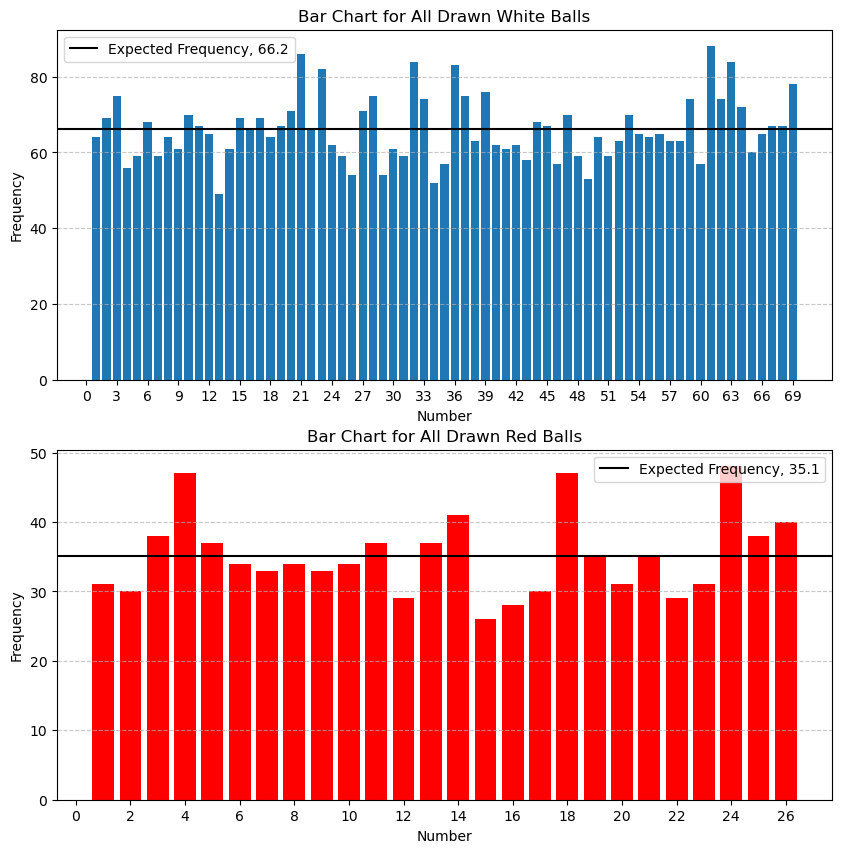

In [12]:
# Create a Figure 
plt.figure(figsize = (10, 10))

# Create the First Subplot
ax1 = plt.subplot(2, 1, 1)

# Create a Bar Chart
plt.bar(all_white_frequency["Number"],
       all_white_frequency["count"])

# Create the expected value for frequency
expected_value = len(all_white_numbers) / 69

# Plot the expected_value
plt.axhline(y = expected_value, color = "black", label = "Expected Frequency, 66.2")

# Create Labels
plt.title("Bar Chart for All Drawn White Balls")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.legend()

# Create the X-Labels
ax1.set_xticks(list(filter(lambda x: x % 3 == 0, range(70))))
plt.grid(axis='y', linestyle='--', alpha=0.7)


#################
# Create the Second Subplot
ax1 = plt.subplot(2, 1, 2)

# Create a Bar Chart
plt.bar(all_red_frequency["Number"],
       all_red_frequency["count"],
       color = "red")

# Create the expected value for frequency
expected_value = len(all_red_numbers) / 26

# Plot the expected_value
plt.axhline(y = expected_value, color = "black", label = "Expected Frequency, 35.1")

# Create Labels
plt.title("Bar Chart for All Drawn Red Balls")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.legend()

# Create the X-Labels
ax1.set_xticks(list(filter(lambda x: x % 2 == 0, range(27))))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show and Close the Plot
plt.show()
plt.close()

For both `White Balls` and `Red Balls` we see that there are some numbers that are 
- less than the expected frequency 
    - `White Balls`: `13`, `26`, `34`
    - `Red Balls`: `15`, `16`, `22`
- more than the expected frequency
    - `White Balls`: `21`, `32`, `61`
    - `Red Balls`: `4`, `18`, `24`
- equal to the expected frequency
    - `White Balls`: `11`, `19`, `22`
    - `Red Balls`: `19`, `21`

We can use a **Chi-Square Test** to compare the expected frequencies to the actual drawn numbers. If we can show that there is a statistically significant difference in a specific number compared to the expected frequency, then we might be able to show potential bias in the game.

## The Chi-Square Goodness-of-Fit Test

The Chi-Square Test Statistic is used to summarize how different two tables are. To calculate the Chi-Square statistic, we need to find the squared difference between each value in the observed table and its corresponding value in the expected table. Then, we divide that number by the value from the expected table. Finally, we add all of those numbers together:

$$ \text{Chi Square Statistic} = \sum \frac{(observed - expected)^2}{expected} $$

The **Chi-Square Goodness of Fit Test** is a statistical hypothesis test that is used to determine how the observed value of an event differs from the expected value. This test will help us determine whether a variable comes from a certain distribution. We will be testing if the `White Balls` and the `Red Balls` follow a **Uniform Distribution**.

In [13]:
# Import the Library for Chi-Square
from scipy.stats import chisquare

In [14]:
# Rename the Columns
all_white_frequency.columns = ["Number", "Observed Frequency"]
all_red_frequency.columns = ["Number", "Observed Frequency"]

# Create new columns, "Expected Frequency"
all_white_frequency["Expected Frequency"] = np.sum(all_white_frequency["Observed Frequency"]) / len(all_white_frequency)
all_red_frequency["Expected Frequency"] = np.sum(all_red_frequency["Observed Frequency"] / len(all_red_frequency))

### White Balls
- **Null Hypothesis**: The `White Balls` follow a **Uniform Distribution**
- **Alternative Hypothesis**: The `White Balls` do not follow a **Uniform Distribution**

### Red Balls
- **Null Hypothesis**: The `Red Balls` follow a **Uniform Distribution**
- **Alternative Hypothesis**: The `Red Balls` do not follow a **Uniform Distribution**

with α = 0.05.

In [15]:
# Calculate the Chi-Square Goodness of Fit Test for White Balls
chi2, pval = chisquare(all_white_frequency["Observed Frequency"], 
                             f_exp = all_white_frequency["Expected Frequency"])
chi2_crit_val = stats.chi2.ppf(1 - 0.05, df = 68)
print("White Balls:")
print("Chi-Square Statistic: " + str(round(chi2, 2)))
print("P-Value: " + str(round(pval, 2)))
print("Chi-Square Critical Value: " + str(round(chi2_crit_val, 2)), "\n")

# Calculate the Chi-Square Goodness of Fit Test for Red Balls
chi2, pval = chisquare(all_red_frequency["Observed Frequency"], 
                             f_exp = all_red_frequency["Expected Frequency"])
chi2_crit_val = stats.chi2.ppf(1 - 0.05, df = 68)
print("Red Balls:")
print("Chi-Square Statistic: " + str(round(chi2, 2)))
print("P-Value: " + str(round(pval, 2)))
print("Chi-Square Critical Value: " + str(round(chi2_crit_val, 2)))

White Balls:
Chi-Square Statistic: 72.78
P-Value: 0.32
Chi-Square Critical Value: 88.25 

Red Balls:
Chi-Square Statistic: 24.45
P-Value: 0.49
Chi-Square Critical Value: 88.25


### Interpretation of the Chi-Square Goodness-of-Fit Tests

With an α = 0.05, we **fail to reject the null hypotheses** for both of the Chi-Square Goodness-of-Fit Tests since there is insufficient evidence to conclude that the observed frequency distribution deviates from what is expected under a uniform distribution assumption.

This shows that the numbers drawn in the Powerball is consistent to randomness. The game may be fair and may not be influenced by any systematic biases or irregularities. Although the observed frequencies do not perfectly match a uniform distribution, the differences may be minor and are thus statistically insignificant. These observed differences could be due to random fluctuations.

However, failing to reject the null hypothesis does not prove that the lottery game is fair or that there are no biases. We will continue to investigate throughout the study.

## Plotting Each Ball Position to Another Ball Position



In [16]:
lottery.head()

,Draw Date,Winning Numbers,Multiplier,First Winning Number,Second Winning Number,Third Winning Number,Fourth Winning Number,Fifth Winning Number,Red Ball Number,Draw Month,Draw Day,Draw Year
0,09/26/2020,11 21 27 36 62 24,3.0,11,21,27,36,62,24,9,26,2020
1,09/30/2020,14 18 36 49 67 18,2.0,14,18,36,49,67,18,9,30,2020
2,10/03/2020,18 31 36 43 47 20,2.0,18,31,36,43,47,20,10,3,2020
3,10/07/2020,06 24 30 53 56 19,2.0,6,24,30,53,56,19,10,7,2020
4,10/10/2020,05 18 23 40 50 18,3.0,5,18,23,40,50,18,10,10,2020


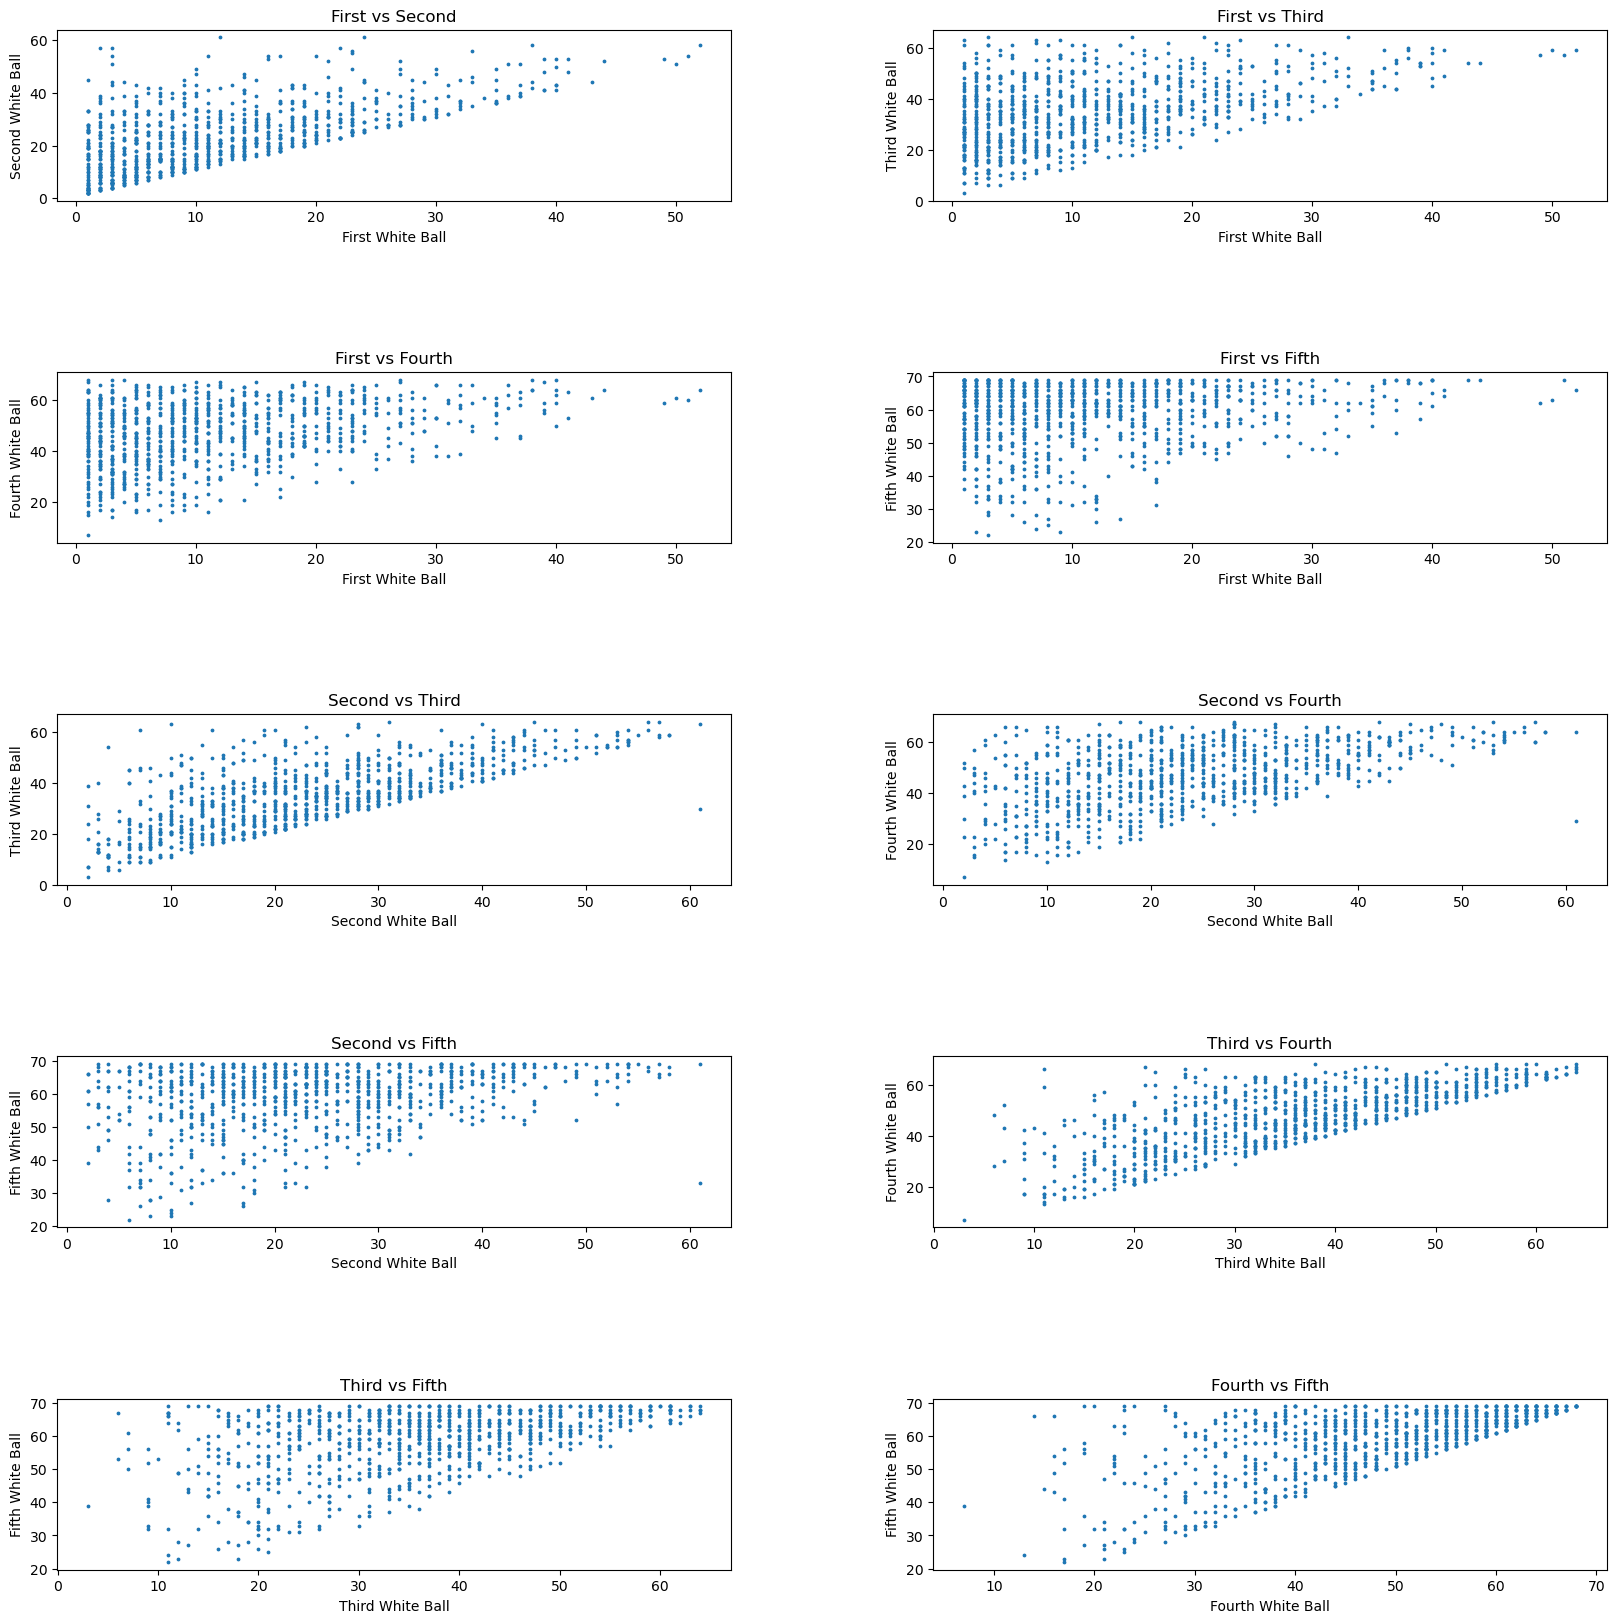

In [17]:
def plot_balls(x, y, title, xname, yname):
    plt.scatter(x, y, s = 3)
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)

    
    
# Create a Figure to Showcase a Scatterplot of Each Winning Number to its Summation
fig = plt.figure(figsize = (20, 20))
plt.subplots_adjust(wspace = 0.3)
plt.subplots_adjust(hspace = 1)

# First Plot
ax1 = fig.add_subplot(5, 2, 1)
plot_balls(lottery["First Winning Number"], lottery["Second Winning Number"], "First vs Second", "First White Ball", "Second White Ball")

ax2 = fig.add_subplot(5, 2, 2)
plot_balls(lottery["First Winning Number"], lottery["Third Winning Number"], "First vs Third", "First White Ball", "Third White Ball")

ax3 = fig.add_subplot(5, 2, 3)
plot_balls(lottery["First Winning Number"], lottery["Fourth Winning Number"], "First vs Fourth", "First White Ball", "Fourth White Ball")

ax4 = fig.add_subplot(5, 2, 4)
plot_balls(lottery["First Winning Number"], lottery["Fifth Winning Number"], "First vs Fifth", "First White Ball", "Fifth White Ball")

ax5 = fig.add_subplot(5, 2, 5)
plot_balls(lottery["Second Winning Number"], lottery["Third Winning Number"], "Second vs Third", "Second White Ball", "Third White Ball")

ax6 = fig.add_subplot(5, 2, 6)
plot_balls(lottery["Second Winning Number"], lottery["Fourth Winning Number"], "Second vs Fourth", "Second White Ball", "Fourth White Ball")

ax7 = fig.add_subplot(5, 2, 7)
plot_balls(lottery["Second Winning Number"], lottery["Fifth Winning Number"], "Second vs Fifth", "Second White Ball", "Fifth White Ball")

ax8 = fig.add_subplot(5, 2, 8)
plot_balls(lottery["Third Winning Number"], lottery["Fourth Winning Number"], "Third vs Fourth", "Third White Ball", "Fourth White Ball")

ax9 = fig.add_subplot(5, 2, 9)
plot_balls(lottery["Third Winning Number"], lottery["Fifth Winning Number"], "Third vs Fifth", "Third White Ball", "Fifth White Ball")

ax10 = fig.add_subplot(5, 2, 10)
plot_balls(lottery["Fourth Winning Number"], lottery["Fifth Winning Number"], "Fourth vs Fifth", "Fourth White Ball", "Fifth White Ball")

plt.show()
plt.close()

## The Central Limit Theorem

The Central Limit Theorem (CLT) describes the behavior of the sampling distribution of the sample mean (or sum) of a random variable, regardless of the shape of the original distribution. Under certain condistions, as the sample size increases, the distribution of the sample mean (or sum) appreachoes a normal distribution, regardless of the shape of the population distribution.

The Central Limit Theorem, therefore, suggests that the distribution of the sum of `White Balls` tends toward a normal distribution as the number of draws increases.  This means that for a large number of draws, the distribution of the sum of `White Balls` may resemble a bell-shaped curve even though the individual number distributions are not normal, in this case, we'll assume that the individual number distribution are following a uniform distribution.

We will create new columns in our DataFrame to showcase the `Sum of White Balls` and the `Sum of All Balls`.

In [18]:
lottery["Sum of White Balls"] = lottery["First Winning Number"] + lottery["Second Winning Number"] + lottery["Third Winning Number"] + lottery["Fourth Winning Number"] + lottery["Fifth Winning Number"]
lottery["Sum of All Balls"] = lottery["Sum of White Balls"] + lottery["Red Ball Number"]

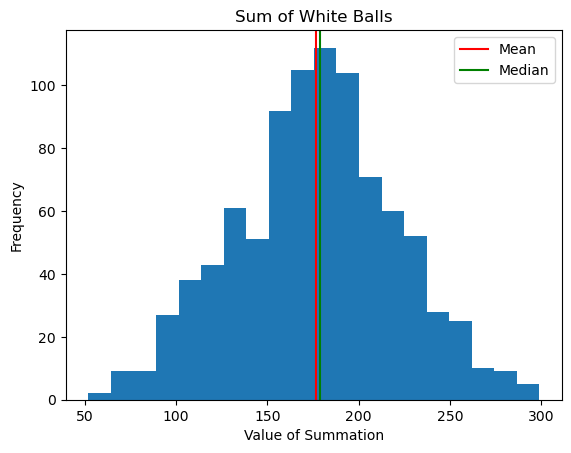

The Sample Mean: 176.57
The Sample Median: 179.0


In [19]:
# Create a Histogram
plt.hist(lottery["Sum of White Balls"], bins = 20)

# Define the Median and Mean 
median = lottery["Sum of White Balls"].median()
mean = lottery["Sum of White Balls"].mean()

# Construct the Median and Mean Lines
plt.axvline(x = mean, color = "red", label = "Mean")
plt.axvline(x = median, color = "green", label = "Median")

# Create Labels
plt.title("Sum of White Balls")
plt.xlabel("Value of Summation")
plt.ylabel("Frequency")
plt.legend()

# Show and Close the Plot
plt.show()
plt.close()

#print(np.min(lottery["Sum of White Balls"])) # Output: 52
#print(np.max(lottery["Sum of White Balls"])) # Output: 299
#print(len(lottery)) # Output: 913
print("The Sample Mean: " + str(round(mean, 2)))
print("The Sample Median: " + str(round(median, 2)))

## Confidence Intervals

**Confidence Intervals** are a range of values estimated from a sample that are likely to contain the true population parameter with a specified level of confidence. These invertals provide a way to quantify the uncertainty associated with estimating population parameters based on the sample data.

In [20]:
# Gather the Sum of White Balls into an Array
data = np.array(lottery["Sum of White Balls"])

# Calculate the Mean and Standard Error of the Mean
sample_mean = np.mean(data)
standard_error = stats.sem(data)

# Define the Confidence Level
confidence_level = 0.95

# Calculate the Margin of Error
margin_of_error = standard_error * stats.t.ppf((1 + confidence_level) / 2, len(data) - 1)

# Calculate the Confidence Interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("White Balls")
print("Sample Mean: " + str(round(sample_mean, 2)))
print("Standard Error: " + str(round(standard_error, 2)))
print("95% Confidence Interval: (" + str(round(confidence_interval[0], 2)) + ", " + str(round(confidence_interval[1], 2)) + ")", "\n")

#####
# Gather the Sum of All Balls into an Array
data = np.array(lottery["Sum of All Balls"])

# Calculate the Mean and Standard Error of the Mean
sample_mean = np.mean(data)
standard_error = stats.sem(data)

# Define the Confidence Level
confidence_level = 0.95

# Calculate the Margin of Error
margin_of_error = standard_error * stats.t.ppf((1 + confidence_level) / 2, len(data) - 1)

# Calculate the Confidence Interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("All Balls")
print("Sample Mean: " + str(round(sample_mean, 2)))
print("Standard Error: " + str(round(standard_error, 2)))
print("95% Confidence Interval: (" + str(round(confidence_interval[0], 2)) + ", " + str(round(confidence_interval[1], 2)) + ")")


White Balls
Sample Mean: 176.57
Standard Error: 1.47
95% Confidence Interval: (173.69, 179.45) 

All Balls
Sample Mean: 190.19
Standard Error: 1.48
95% Confidence Interval: (187.28, 193.11)


We are 95% confident that the true population mean of the sum of `White Balls` is between `173.69` and `179.45`, and we are also 95% confident that the true population mean of the sum of `All Balls` is between `187.28` and `193.11`.

## Plotting each Positional White Ball vs the Sum of White Balls



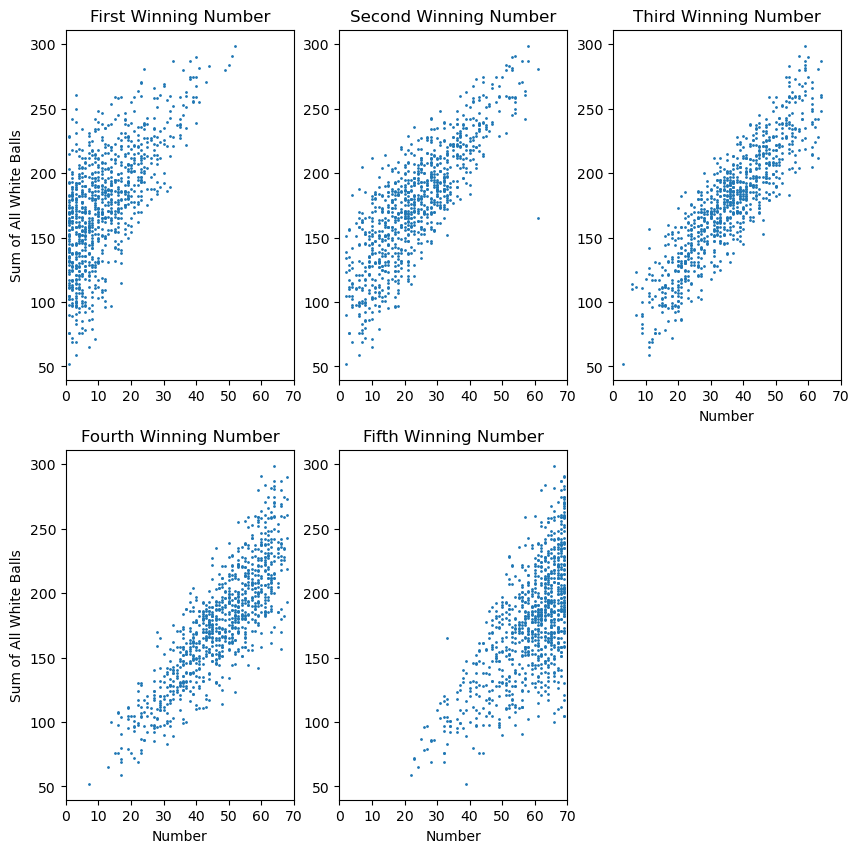

In [21]:
# Create a Figure to Showcase a Scatterplot of Each Winning Number to its Summation
fig = plt.figure(figsize = (10, 10))

# First Plot
ax1 = fig.add_subplot(2, 3, 1)
plt.scatter(lottery["First Winning Number"], lottery["Sum of White Balls"], 
           s = 1)
plt.title("First Winning Number")
plt.ylabel("Sum of All White Balls")
plt.xlim(0, 70)
ax1.set_xticks(list(filter(lambda x: x % 10 == 0, range(71))))

# Second Plot
ax2 = fig.add_subplot(2, 3, 2)
plt.scatter(lottery["Second Winning Number"], lottery["Sum of White Balls"],
           s = 1)
plt.title("Second Winning Number")
plt.xlim(0, 70)
ax2.set_xticks(list(filter(lambda x: x % 10 == 0, range(71))))

# Third Plot
ax3 = fig.add_subplot(2, 3, 3)
plt.scatter(lottery["Third Winning Number"], lottery["Sum of White Balls"],
           s = 1)
plt.title("Third Winning Number")
plt.xlabel("Number")
plt.xlim(0, 70)
ax3.set_xticks(list(filter(lambda x: x % 10 == 0, range(71))))


# Fourth Plot
ax4 = fig.add_subplot(2, 3, 4)
plt.scatter(lottery["Fourth Winning Number"], lottery["Sum of White Balls"],
           s = 1)
plt.title("Fourth Winning Number")
plt.xlabel("Number")
plt.ylabel("Sum of All White Balls")
plt.xlim(0, 70)
ax4.set_xticks(list(filter(lambda x: x % 10 == 0, range(71))))


# Fifth Plot
ax5 = fig.add_subplot(2, 3, 5)
plt.scatter(lottery["Fifth Winning Number"], lottery["Sum of White Balls"],
           s = 1)
plt.title("Fifth Winning Number")
plt.xlabel("Number")
plt.xlim(0, 70)
ax5.set_xticks(list(filter(lambda x: x % 10 == 0, range(71))))


plt.show()
plt.close()

## Plotting each Positional White Ball vs the Sum of All Balls


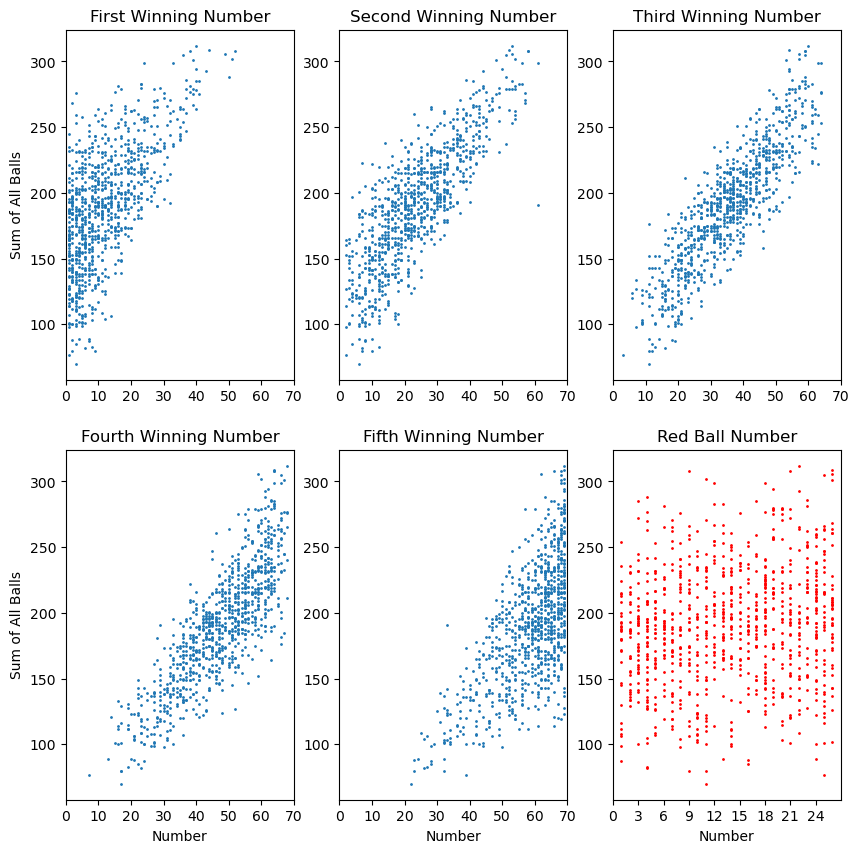

In [22]:
# Create a Figure to Showcase a Scatterplot of Each Winning Number to its Summation
fig = plt.figure(figsize = (10, 10))

# First Plot
ax1 = fig.add_subplot(2, 3, 1)
plt.scatter(lottery["First Winning Number"], lottery["Sum of All Balls"], 
           s = 1)
plt.title("First Winning Number")
plt.ylabel("Sum of All Balls")
plt.xlim(0, 70)
ax1.set_xticks(list(filter(lambda x: x % 10 == 0, range(71))))

# Second Plot
ax2 = fig.add_subplot(2, 3, 2)
plt.scatter(lottery["Second Winning Number"], lottery["Sum of All Balls"],
           s = 1)
plt.title("Second Winning Number")
plt.xlim(0, 70)
ax2.set_xticks(list(filter(lambda x: x % 10 == 0, range(71))))

# Third Plot
ax3 = fig.add_subplot(2, 3, 3)
plt.scatter(lottery["Third Winning Number"], lottery["Sum of All Balls"],
           s = 1)
plt.title("Third Winning Number")
plt.xlim(0, 70)
ax3.set_xticks(list(filter(lambda x: x % 10 == 0, range(71))))


# Fourth Plot
ax4 = fig.add_subplot(2, 3, 4)
plt.scatter(lottery["Fourth Winning Number"], lottery["Sum of All Balls"],
           s = 1)
plt.title("Fourth Winning Number")
plt.xlabel("Number")
plt.ylabel("Sum of All Balls")
plt.xlim(0, 70)
ax4.set_xticks(list(filter(lambda x: x % 10 == 0, range(71))))


# Fifth Plot
ax5 = fig.add_subplot(2, 3, 5)
plt.scatter(lottery["Fifth Winning Number"], lottery["Sum of All Balls"],
           s = 1)
plt.title("Fifth Winning Number")
plt.xlabel("Number")
plt.xlim(0, 70)
ax5.set_xticks(list(filter(lambda x: x % 10 == 0, range(71))))

# Sixth Plot
ax6 = fig.add_subplot(2, 3, 6)
plt.scatter(lottery["Red Ball Number"], lottery["Sum of All Balls"],
           s = 1, color = "red")
plt.title("Red Ball Number")
plt.xlabel("Number")
plt.xlim(0, 27)
ax6.set_xticks(list(filter(lambda x: x % 3 == 0, range(27))))


plt.show()
plt.close()

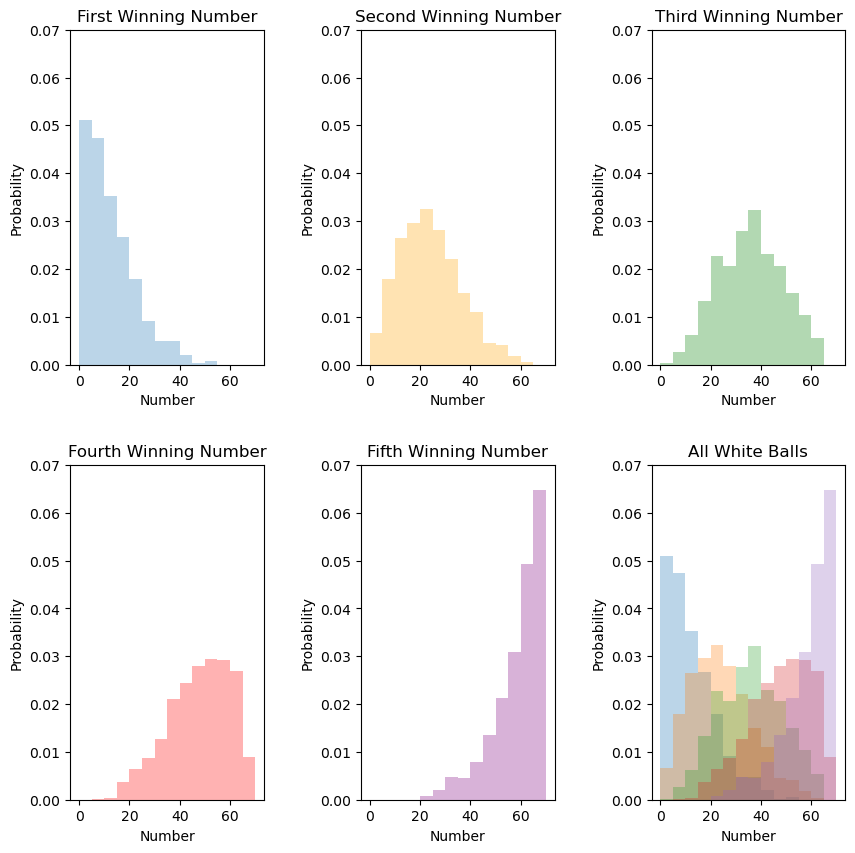

In [23]:
# Create a Figure to Showcase the Distribution of Each White Ball
fig = plt.figure(figsize = (10, 10))
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace = 0.3)
bins = list(filter(lambda x: x % 5 == 0, range(71)))


# First Plot
ax1 = fig.add_subplot(2, 3, 1)
plt.hist(lottery["First Winning Number"], bins = bins, density = True,
         range = (0, 70), alpha = 0.3, label = "First Winning Number")
plt.title("First Winning Number")
plt.xlabel("Number")
plt.ylabel("Probability")
plt.ylim(0, 0.07)

# Second Plot
ax2 = fig.add_subplot(2, 3, 2)
plt.hist(lottery["Second Winning Number"], bins = bins, density = True,
         range = (0, 70), alpha = 0.3, label = "Second Winning Number", color = "orange")
plt.title("Second Winning Number")
plt.xlabel("Number")
plt.ylabel("Probability")
plt.ylim(0, 0.07)

# Third Plot
ax3 = fig.add_subplot(2, 3, 3)
plt.hist(lottery["Third Winning Number"], bins = bins, density = True,
         range = (0, 70), alpha = 0.3, label = "Third Winning Number", color = "green")
plt.title("Third Winning Number")
plt.xlabel("Number")
plt.ylabel("Probability")
plt.ylim(0, 0.07)


# Fourth Plot
ax4 = fig.add_subplot(2, 3, 4)
plt.hist(lottery["Fourth Winning Number"], bins = bins, density = True,
         range = (0, 70), alpha = 0.3, label = "Fourth Winning Number", color = "red")
plt.title("Fourth Winning Number")
plt.xlabel("Number")
plt.ylabel("Probability")
plt.ylim(0, 0.07)

# Fifth Plot
ax5 = fig.add_subplot(2, 3, 5)
plt.hist(lottery["Fifth Winning Number"], bins = bins, density = True, 
         range = (0, 70), alpha = 0.3, label = "Fifth Winning Number", color = "purple")
plt.title("Fifth Winning Number")
plt.xlabel("Number")
plt.ylabel("Probability")
plt.ylim(0, 0.07)

# Sixth Plot
ax6 = fig.add_subplot(2, 3, 6)
plt.hist(lottery["First Winning Number"], bins = bins, density = True, range = (0, 70), alpha = 0.3, label = "First Winning Number")
plt.hist(lottery["Second Winning Number"], bins = bins, density = True, range = (0, 70), alpha = 0.3, label = "Second Winning Number")
plt.hist(lottery["Third Winning Number"], bins = bins, density = True, range = (0, 70), alpha = 0.3, label = "Third Winning Number")
plt.hist(lottery["Fourth Winning Number"], bins = bins, density = True, range = (0, 70), alpha = 0.3, label = "Fourth Winning Number")
plt.hist(lottery["Fifth Winning Number"], bins = bins, density = True, range = (0, 70), alpha = 0.3, label = "Fifth Winning Number")
plt.ylim(0, 0.07)
plt.title("All White Balls")
plt.xlabel("Number")
plt.ylabel("Probability")
plt.show()


plt.show()
plt.close()

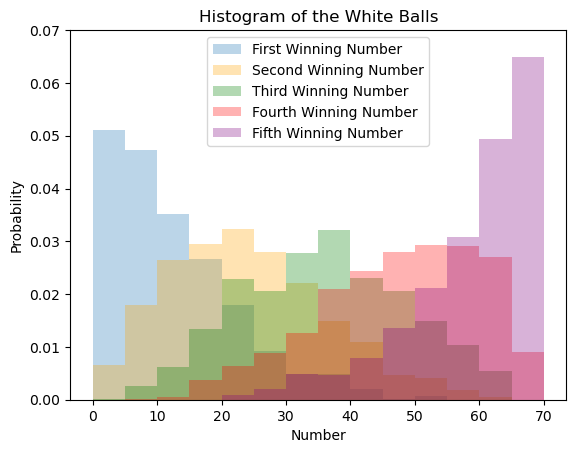

In [24]:
# Show the Combined Histogram in One Graph
plt.hist(lottery["First Winning Number"], bins = bins, density = True, range = (0, 70), alpha = 0.3, label = "First Winning Number")
plt.hist(lottery["Second Winning Number"], bins = bins, density = True, range = (0, 70), alpha = 0.3, label = "Second Winning Number", color = "orange")
plt.hist(lottery["Third Winning Number"], bins = bins, density = True, range = (0, 70), alpha = 0.3, label = "Third Winning Number", color = "green")
plt.hist(lottery["Fourth Winning Number"], bins = bins, density = True, range = (0, 70), alpha = 0.3, label = "Fourth Winning Number", color = "red")
plt.hist(lottery["Fifth Winning Number"], bins = bins, density = True, range = (0, 70), alpha = 0.3, label = "Fifth Winning Number", color = "purple")

# Create Labels
plt.title("Histogram of the White Balls")
plt.xlabel("Number")
plt.ylabel("Probability")
plt.ylim(0, 0.07)
plt.legend()

plt.show()

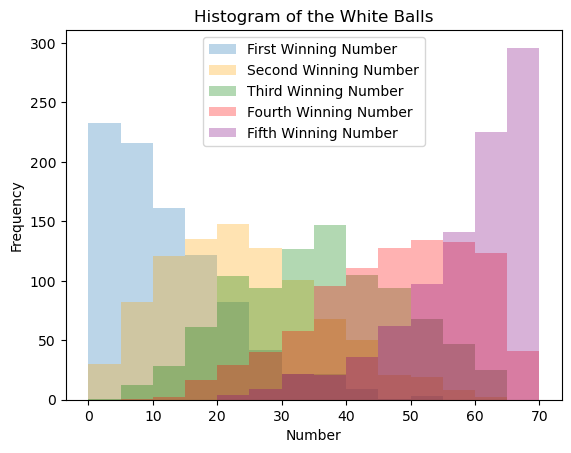

In [25]:
# Show the Combined Histogram in One Graph
plt.hist(lottery["First Winning Number"], bins = bins, range = (0, 70), alpha = 0.3, label = "First Winning Number")
plt.hist(lottery["Second Winning Number"], bins = bins, range = (0, 70), alpha = 0.3, label = "Second Winning Number", color = "orange")
plt.hist(lottery["Third Winning Number"], bins = bins, range = (0, 70), alpha = 0.3, label = "Third Winning Number", color = "green")
plt.hist(lottery["Fourth Winning Number"], bins = bins, range = (0, 70), alpha = 0.3, label = "Fourth Winning Number", color = "red")
plt.hist(lottery["Fifth Winning Number"], bins = bins, range = (0, 70), alpha = 0.3, label = "Fifth Winning Number", color = "purple")

# Create Labels
plt.title("Histogram of the White Balls")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.legend()

plt.show()

In [26]:
all_white_frequency.head()

,Number,Observed Frequency,Expected Frequency
36,1,64,66.15942
20,2,69,66.15942
9,3,75,66.15942
63,4,56,66.15942
58,5,59,66.15942


In [27]:
lottery.head()

,Draw Date,Winning Numbers,Multiplier,First Winning Number,Second Winning Number,Third Winning Number,Fourth Winning Number,Fifth Winning Number,Red Ball Number,Draw Month,Draw Day,Draw Year,Sum of White Balls,Sum of All Balls
0,09/26/2020,11 21 27 36 62 24,3.0,11,21,27,36,62,24,9,26,2020,157,181
1,09/30/2020,14 18 36 49 67 18,2.0,14,18,36,49,67,18,9,30,2020,184,202
2,10/03/2020,18 31 36 43 47 20,2.0,18,31,36,43,47,20,10,3,2020,175,195
3,10/07/2020,06 24 30 53 56 19,2.0,6,24,30,53,56,19,10,7,2020,169,188
4,10/10/2020,05 18 23 40 50 18,3.0,5,18,23,40,50,18,10,10,2020,136,154


In [28]:
# Binning the White Numbers
bins = list(filter(lambda x: x % 5 == 0, range(71)))

lottery["First Winning Number Binned"] = pd.cut(lottery["First Winning Number"], bins)
lottery["Second Winning Number Binned"] = pd.cut(lottery["Second Winning Number"], bins)
lottery["Third Winning Number Binned"] = pd.cut(lottery["Third Winning Number"], bins)
lottery["Fourth Winning Number Binned"] = pd.cut(lottery["Fourth Winning Number"], bins)
lottery["Fifth Winning Number Binned"] = pd.cut(lottery["Fifth Winning Number"], bins)

In [29]:
bins_list = ["(0, 5]", "(5, 10]", "(10, 15]", "(15, 20]", "(20, 25]",
             "(25, 30]", "(30, 35]", "(35, 40]", "(40, 45]", "(45, 50]", 
             "(50, 55]", "(55, 60]", "(60, 65]", "(65, 70]"]

In [30]:
# Create a DataFrame of Binned Data
df = lottery[["First Winning Number Binned", "Second Winning Number Binned",
                         "Third Winning Number Binned", "Fourth Winning Number Binned",
                         "Fifth Winning Number Binned"]]

binned_lottery = pd.DataFrame()

for column in df.columns:
    value_counts = df[column].value_counts()
    binned_lottery[column] = value_counts


In [31]:
binned_lottery

,First Winning Number Binned,Second Winning Number Binned,Third Winning Number Binned,Fourth Winning Number Binned,Fifth Winning Number Binned
First Winning Number Binned,,,,,
"(0, 5]",286,36,1,0,0
"(5, 10]",204,104,13,1,0
"(10, 15]",143,127,38,3,0
"(15, 20]",115,132,72,18,0
"(20, 25]",75,150,93,32,5
"(25, 30]",40,120,102,44,9
"(30, 35]",22,87,134,62,21
"(35, 40]",20,68,141,104,26
"(40, 45]",4,46,107,121,38


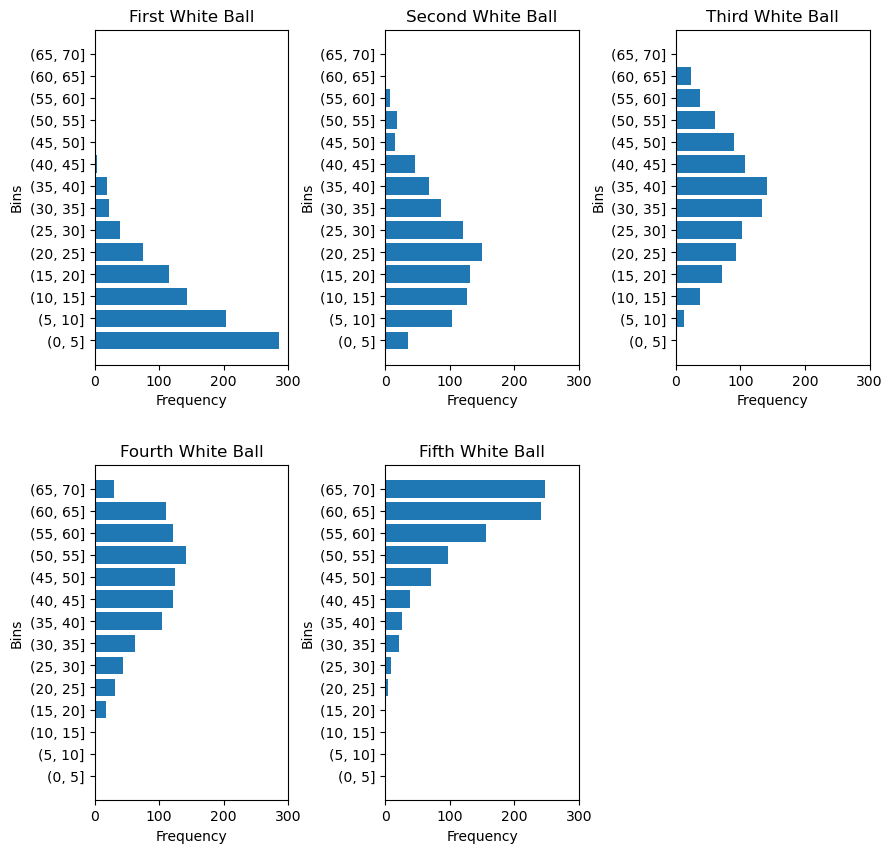

In [32]:
# Create a Bar Graph of the Binned White Balls
fig = plt.figure(figsize = (10, 10))
plt.subplots_adjust(hspace = 0.3, wspace = 0.5)


# First Plot
ax1 = fig.add_subplot(2, 3, 1)
plt.barh(bins_list, binned_lottery["First Winning Number Binned"])
plt.title("First White Ball")
plt.xlabel("Frequency")
plt.ylabel("Bins")
plt.xlim(0, 300)

# Second Plot
ax2 = fig.add_subplot(2, 3, 2)
plt.barh(bins_list, binned_lottery["Second Winning Number Binned"])
plt.title("Second White Ball")
plt.xlabel("Frequency")
plt.ylabel("Bins")
plt.xlim(0, 300)

# Third Plot
ax3 = fig.add_subplot(2, 3, 3)
plt.barh(bins_list, binned_lottery["Third Winning Number Binned"])
plt.title("Third White Ball")
plt.xlabel("Frequency")
plt.ylabel("Bins")
plt.xlim(0, 300)

# Fourth Plot
ax4 = fig.add_subplot(2, 3, 4)
plt.barh(bins_list, binned_lottery["Fourth Winning Number Binned"])
plt.title("Fourth White Ball")
plt.xlabel("Frequency")
plt.ylabel("Bins")
plt.xlim(0, 300)

# Fifth Plot
ax5 = fig.add_subplot(2, 3, 5)
plt.barh(bins_list, binned_lottery["Fifth Winning Number Binned"])
plt.title("Fifth White Ball")
plt.xlabel("Frequency")
plt.ylabel("Bins")
plt.xlim(0, 300)

# Show and Close the Plot
plt.show()
plt.close()

In [33]:
lottery.head()

,Draw Date,Winning Numbers,Multiplier,First Winning Number,Second Winning Number,Third Winning Number,Fourth Winning Number,Fifth Winning Number,Red Ball Number,Draw Month,Draw Day,Draw Year,Sum of White Balls,Sum of All Balls,First Winning Number Binned,Second Winning Number Binned,Third Winning Number Binned,Fourth Winning Number Binned,Fifth Winning Number Binned
0,09/26/2020,11 21 27 36 62 24,3.0,11,21,27,36,62,24,9,26,2020,157,181,"(10, 15]","(20, 25]","(25, 30]","(35, 40]","(60, 65]"
1,09/30/2020,14 18 36 49 67 18,2.0,14,18,36,49,67,18,9,30,2020,184,202,"(10, 15]","(15, 20]","(35, 40]","(45, 50]","(65, 70]"
2,10/03/2020,18 31 36 43 47 20,2.0,18,31,36,43,47,20,10,3,2020,175,195,"(15, 20]","(30, 35]","(35, 40]","(40, 45]","(45, 50]"
3,10/07/2020,06 24 30 53 56 19,2.0,6,24,30,53,56,19,10,7,2020,169,188,"(5, 10]","(20, 25]","(25, 30]","(50, 55]","(55, 60]"
4,10/10/2020,05 18 23 40 50 18,3.0,5,18,23,40,50,18,10,10,2020,136,154,"(0, 5]","(15, 20]","(20, 25]","(35, 40]","(45, 50]"


In [34]:
lottery.head()

,Draw Date,Winning Numbers,Multiplier,First Winning Number,Second Winning Number,Third Winning Number,Fourth Winning Number,Fifth Winning Number,Red Ball Number,Draw Month,Draw Day,Draw Year,Sum of White Balls,Sum of All Balls,First Winning Number Binned,Second Winning Number Binned,Third Winning Number Binned,Fourth Winning Number Binned,Fifth Winning Number Binned
0,09/26/2020,11 21 27 36 62 24,3.0,11,21,27,36,62,24,9,26,2020,157,181,"(10, 15]","(20, 25]","(25, 30]","(35, 40]","(60, 65]"
1,09/30/2020,14 18 36 49 67 18,2.0,14,18,36,49,67,18,9,30,2020,184,202,"(10, 15]","(15, 20]","(35, 40]","(45, 50]","(65, 70]"
2,10/03/2020,18 31 36 43 47 20,2.0,18,31,36,43,47,20,10,3,2020,175,195,"(15, 20]","(30, 35]","(35, 40]","(40, 45]","(45, 50]"
3,10/07/2020,06 24 30 53 56 19,2.0,6,24,30,53,56,19,10,7,2020,169,188,"(5, 10]","(20, 25]","(25, 30]","(50, 55]","(55, 60]"
4,10/10/2020,05 18 23 40 50 18,3.0,5,18,23,40,50,18,10,10,2020,136,154,"(0, 5]","(15, 20]","(20, 25]","(35, 40]","(45, 50]"


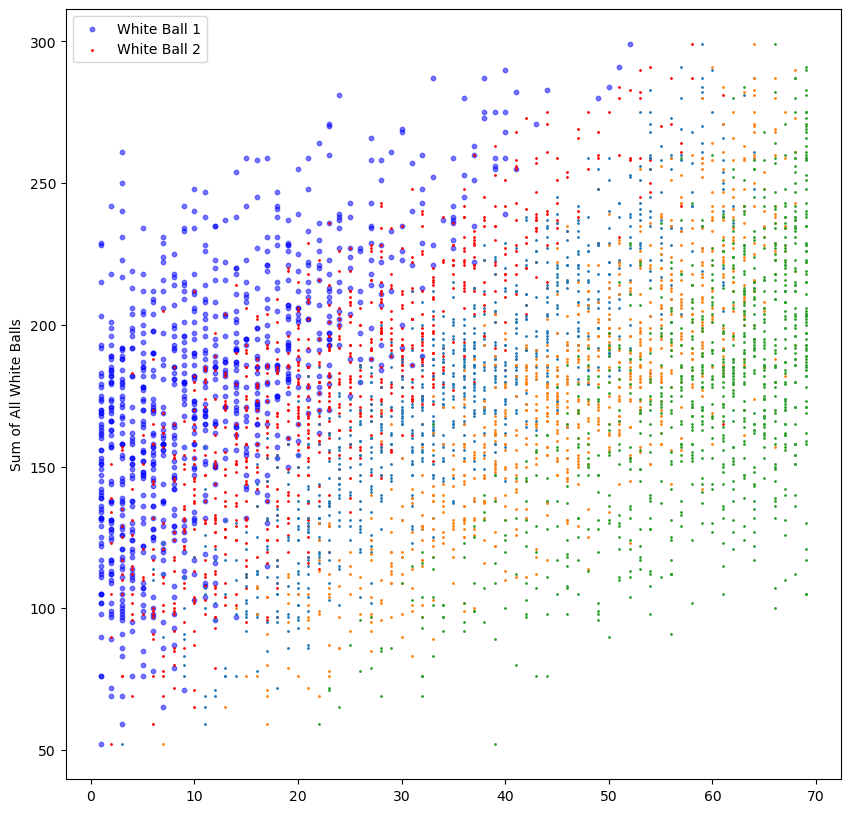

In [35]:
# Create a Figure
fig = plt.figure(figsize = (10, 10))

# First Plot
plt.scatter(lottery["First Winning Number"], lottery["Sum of White Balls"], 
           s = 10, color = "Blue", label = "White Ball 1", alpha = 0.5)
plt.ylabel("Sum of All White Balls")

# Second Plot
plt.scatter(lottery["Second Winning Number"], lottery["Sum of White Balls"],
           s = 1, color = "Red", label = "White Ball 2")

# Third Plot
plt.scatter(lottery["Third Winning Number"], lottery["Sum of White Balls"],
           s = 1)


# Fourth Plot
plt.scatter(lottery["Fourth Winning Number"], lottery["Sum of White Balls"],
           s = 1)


# Fifth Plot
plt.scatter(lottery["Fifth Winning Number"], lottery["Sum of White Balls"],
           s = 1)

plt.legend()

plt.show()
plt.close()

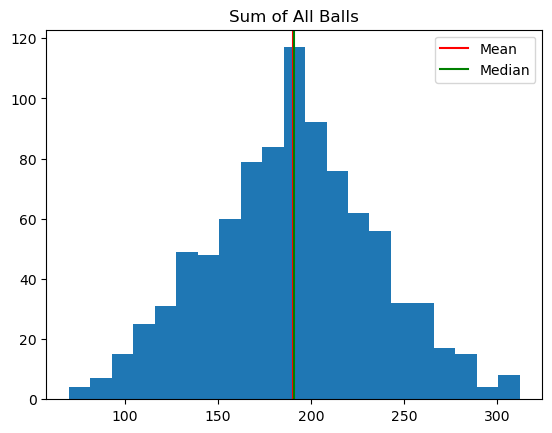

In [36]:
# Create a Histogram
plt.hist(lottery["Sum of All Balls"], bins = 21)

# Define the Median and Mean 
median = lottery["Sum of All Balls"].median()
mean = lottery["Sum of All Balls"].mean()

# Construct the Median and Mean Lines
plt.axvline(x = mean, color = "red", label = "Mean")
plt.axvline(x = median, color = "green", label = "Median")

# Create Labels
plt.title("Sum of All Balls")
plt.legend()

plt.show()
plt.close()

In [37]:
lottery.head()

,Draw Date,Winning Numbers,Multiplier,First Winning Number,Second Winning Number,Third Winning Number,Fourth Winning Number,Fifth Winning Number,Red Ball Number,Draw Month,Draw Day,Draw Year,Sum of White Balls,Sum of All Balls,First Winning Number Binned,Second Winning Number Binned,Third Winning Number Binned,Fourth Winning Number Binned,Fifth Winning Number Binned
0,09/26/2020,11 21 27 36 62 24,3.0,11,21,27,36,62,24,9,26,2020,157,181,"(10, 15]","(20, 25]","(25, 30]","(35, 40]","(60, 65]"
1,09/30/2020,14 18 36 49 67 18,2.0,14,18,36,49,67,18,9,30,2020,184,202,"(10, 15]","(15, 20]","(35, 40]","(45, 50]","(65, 70]"
2,10/03/2020,18 31 36 43 47 20,2.0,18,31,36,43,47,20,10,3,2020,175,195,"(15, 20]","(30, 35]","(35, 40]","(40, 45]","(45, 50]"
3,10/07/2020,06 24 30 53 56 19,2.0,6,24,30,53,56,19,10,7,2020,169,188,"(5, 10]","(20, 25]","(25, 30]","(50, 55]","(55, 60]"
4,10/10/2020,05 18 23 40 50 18,3.0,5,18,23,40,50,18,10,10,2020,136,154,"(0, 5]","(15, 20]","(20, 25]","(35, 40]","(45, 50]"


In [38]:
from collections import Counter

# Initialize a counter to store the frequency of each sum
sum_counter = Counter()

# Iterate through all combinations of outcomes from three dice
for dice1 in range(1, 7):
    for dice2 in range(1, 7):
        for dice3 in range(1, 7):
            # Calculate the sum of the outcomes
            total_sum = dice1 + dice2 + dice3
            # Increment the frequency counter for the sum
            sum_counter[total_sum] += 1

# Find the most frequent sum and its frequency
most_frequent_sum = sum_counter.most_common(1)[0][0]
frequency = sum_counter[most_frequent_sum]

print("Most frequent sum:", most_frequent_sum)
print("Frequency:", frequency)

Most frequent sum: 10
Frequency: 27


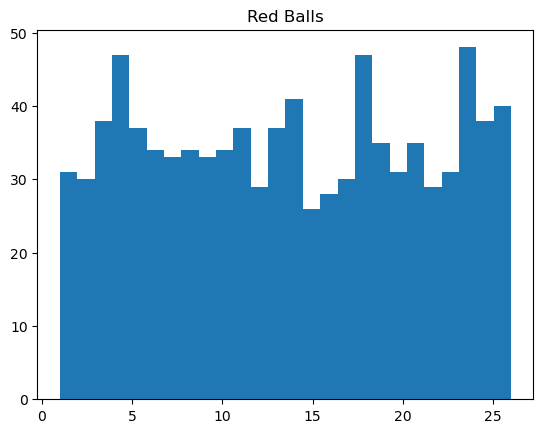

In [39]:
# Create a Histogram
plt.hist(all_red_numbers["Number"], range = (1, 26), bins = 26)

# Create Labels
plt.title("Red Balls")

plt.show()
plt.close()

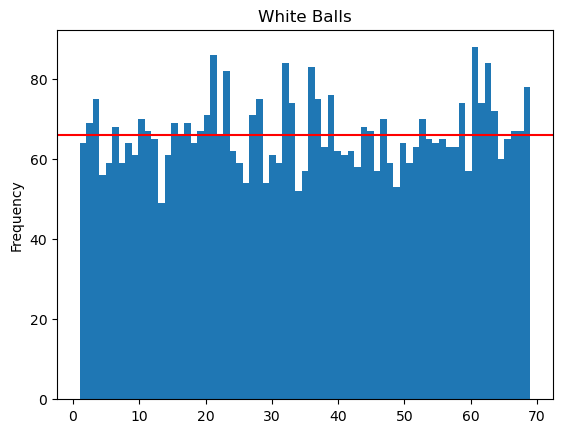

In [40]:
# Create a Histogram
plt.hist(all_white_numbers["Number"], range = (1, 69), bins = 69)

# Create the expected value for frequency
expected_value = len(all_white_numbers) / 69

# Plot the expected_value
plt.axhline(y = expected_value, color = "red", label = "Expected Frequency")

# Create Labels
plt.title("White Balls")
plt.ylabel("Frequency")

plt.show()
plt.close()